In [1]:
import pandas as pd

# Replace 'iris.data' with the actual path to your downloaded Iris dataset .data file
iris_data = pd.read_csv('data/iris.data', header=None)

# Display the first few rows of the dataset
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.Trực quan hóa dữ liệu với các biểu đồ box, histogram và các phân tích thống kê với 4 đặc trưng đầu

c:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


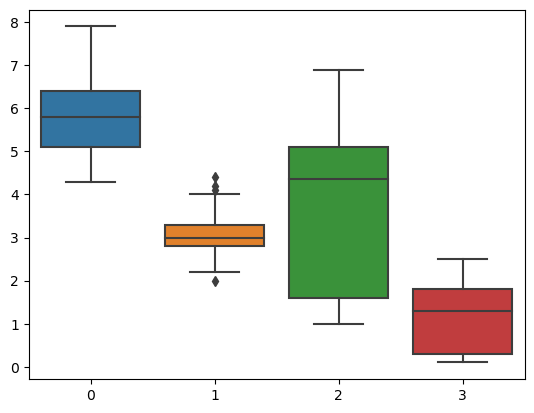

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Trực quan hóa dữ liệu với các biểu đồ box, histogram và các phân tích thống kê với 4 đặc trưng đầu tiên trong bộ dữ liệu iris (sepal length, sepal width, petal length
#và petal width) và cho biết nhận xét của bạn về đặc trưng phân bố của các đặc trưng này.

# Load data

# Boxplot
sns.boxplot(data=iris_data.iloc[:,0:4])
plt.show()

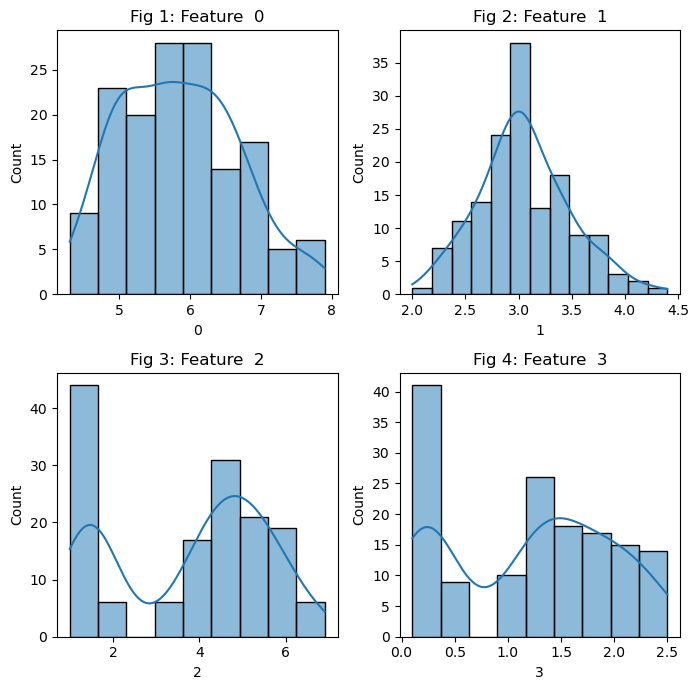

In [3]:
# Histogram
n_rows=2
n_cols=2
fig,ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3.5))

for r in range (0,n_rows):
    for c in range(0,n_cols):
        idx = r*n_cols + c #index loop through list 
        if idx <4:
            ax_idx = ax[r,c]
            sns.histplot(data=iris_data, x=iris_data[idx],kde='true'
                         ,palette='gnuplot',ax=ax_idx)
            ax_idx.set_title(f"Fig {idx+1}: Feature  {idx}") # remove subplot doesn't use 
plt.tight_layout()
plt.show()

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Chuyển đổi các lớp thành số một cách tự động

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_labels  = encoder.fit_transform(iris_data[4])
iris_data[4] = encoded_labels

iris_data.sample(5)

,0,1,2,3,4
100,6.3,3.3,6.0,2.5,2
31,5.4,3.4,1.5,0.4,0
118,7.7,2.6,6.9,2.3,2
83,6.0,2.7,5.1,1.6,1
128,6.4,2.8,5.6,2.1,2


### 3. Sử dụng 4 đặc trưng của bộ dữ liệu, chia bộ dữ liệu thành 2 phần Train/Test với tỉ lệ 7:3, cho biết trong bộ dữ liệu đã cho có dữ liệu nào null không, phân tích bộ dữ liệu theo từng lớp qua các biểu đồ.

Data không có NULL


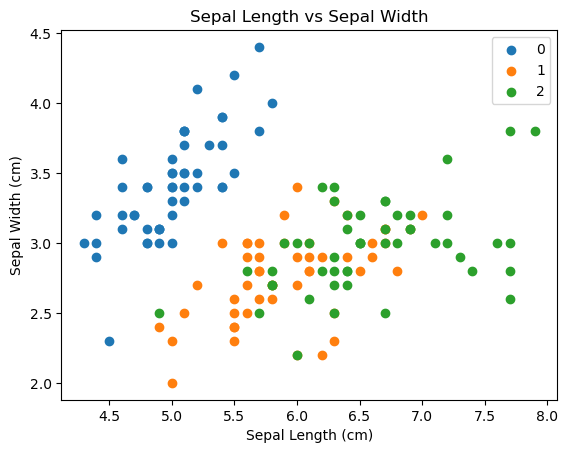

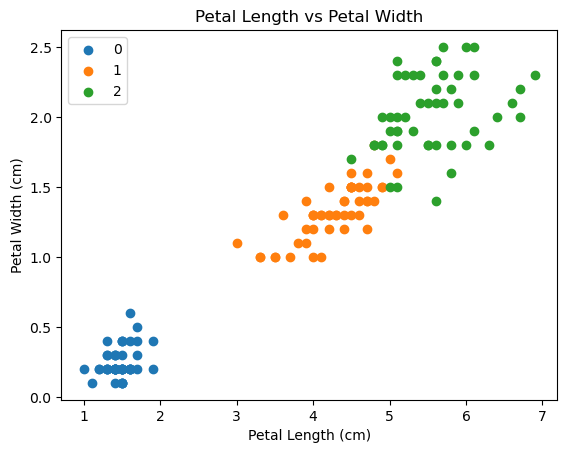

In [8]:
# Sử dụng 4 đặc trưng của bộ dữ liệu, chia bộ dữ liệu thành 2 phần Train/Test với tỉ lệ 7:3, cho biết trong bộ dữ liệu đã cho có dữ liệu nào null không, phân tích bộ dữ liệu theo từng lớp qua các biểu đồ.

from sklearn.model_selection import train_test_split

X = iris_data.drop([4],axis=1)
y = iris_data[4]
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

missing_values = iris_data.isnull().sum().any()
if missing_values:
    print('Số lượng data NULL là :', missing_values.sum())
else:
    print('Data không có NULL')

classes = iris_data[4].unique()
for class_idx, class_name in enumerate(classes):
    class_data = iris_data[iris_data[4] == class_idx]
    
    # Plotting sepal length vs sepal width
    plt.scatter(class_data[0], class_data[1],label=class_name)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('Sepal Length vs Sepal Width')
plt.show()

for class_idx, class_name in enumerate(classes):
    class_data = iris_data[iris_data[4] == class_idx]
    
    # Plotting petal length vs petal width
    plt.scatter(class_data[2], class_data[3], label=class_name)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Petal Length vs Petal Width')
plt.show()


### 4. Đánh giá bộ dữ liệu với giải thuật KNN bằng phương pháp 5-Fold (k-fold)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=5, shuffle=True)
score = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')

print('Accuracy: ', score.mean())

Accuracy:  0.9333333333333332


### 5. Huấn luyện dữ liệu cho bài toán phân lớp sử dụng 4 đặc trưng trên với các giải thuật Bayes, SVM, Logistic Regression và Decision Tree. 

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [12]:
naive_bayes_model = GaussianNB()
svm_model = SVC()
logistic_reg_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()

# Train models
naive_bayes_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
logistic_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
# Predicted

naive_bayes_pred = naive_bayes_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
logistic_reg_pred = logistic_reg_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)

### 6. Tính độ đo F1 score


In [13]:
from sklearn.metrics import f1_score

naive_bayes_f1 = f1_score(y_test, naive_bayes_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
logistic_reg_f1 = f1_score(y_test, logistic_reg_pred, average='weighted')
decision_tree_f1 = f1_score(y_test, decision_tree_pred, average='weighted')

print("Naive Bayes F1-score:", naive_bayes_f1)
print("SVM F1-score:", svm_f1)
print("Logistic Regression F1-score:", logistic_reg_f1)
print("Decision Tree F1-score:", decision_tree_f1)

Naive Bayes F1-score: 0.9777448559670783
SVM F1-score: 1.0
Logistic Regression F1-score: 1.0
Decision Tree F1-score: 1.0


### 7. Tính độ đo Accuracy

In [14]:
from sklearn.metrics import accuracy_score

naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

print("Naive Bayes Accuracy:", naive_bayes_f1)
print("SVM Accuracy:", svm_f1)
print("Logistic Regression Accuracy:", logistic_reg_f1)
print("Decision Tree Accuracy:", decision_tree_f1)

Naive Bayes Accuracy: 0.9777448559670783
SVM Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0


### 8.Tính độ đo Confusion Matrix

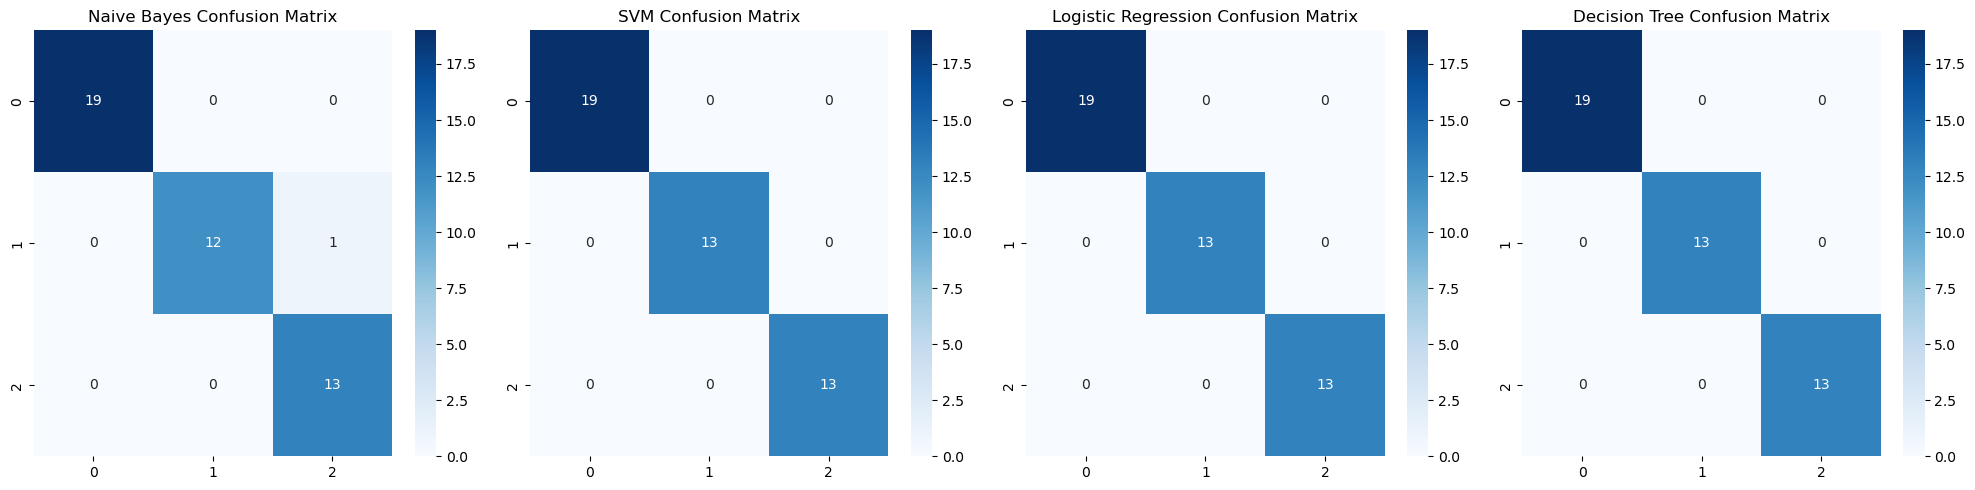

In [15]:
from sklearn.metrics import confusion_matrix

naive_bayes_cm = confusion_matrix(y_test, naive_bayes_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
logistic_reg_cm = confusion_matrix(y_test, logistic_reg_pred)
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)

# plot
plt.figure(figsize=(20, 5))

plt.subplot(141)
sns.heatmap(naive_bayes_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Naive Bayes Confusion Matrix')

plt.subplot(142)
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g')
plt.title('SVM Confusion Matrix')

plt.subplot(143)
sns.heatmap(logistic_reg_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(144)
sns.heatmap(decision_tree_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Confusion Matrix')

plt.tight_layout()
plt.show()

Nhận thấy cả 3 model SVM, Logistic regression, decison tree đều phân loại chính xác 100% vậy nên ta sẽ chọn 1 trong ba và ở ví dụ này ta sẽ chọn SVM để lưu lại

### 10.Lưu model với giải thuật đạt kết quả tốt nhất

In [17]:
from joblib import dump, load
dump(svm_model, 'bestmodel.pkl') 

['bestmodel.pkl']

In [18]:
clf = load('bestmodel.pkl')

In [20]:
clf.predict([[1, 1,5,3]])

array([2])

### 11. Xây dựng ứng dụng với đầu vào là dữ liệu, có thể tự ngõ hay từ 1 file, in kết quả ra màn hình


In [21]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/20/fb/c52ddcedbb0cb142ab6f22b6d1ccee6162ade7d61ca139bc064168262ced/streamlit-1.25.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/b2/20/5c3b89d6f8d9938325a9330793438389e0dc94c34d921f6da35ec62095f3/altair-5.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<5,>=3.20 from https://files.pythonhosted.org/packages/e2/49/9dcf3f6d682adff00150305f3195fb675873fd4758eb686e062582c2f0d5/protobuf-4.24.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for pyarrow>=6.0 from https://files.pythonhosted.org/packages/dc/45/31441c988329afed625a791a7d78f1cf2fcb40dcc86a1d61e081287516a8/pyarrow-12.0.1-cp39-cp39-win_amd64.whl.metadata
     -------------------------------------- 164.8/164.8 kB 2.0 MB/s eta 0:00:00
  Obtaining dependency information for rich<14,>=10.14.0 from https://files.p

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
manimce 0.1.1.post2 requires rich<7.0,>=6.0, but you have rich 13.5.2 which is incompatible.
tensorboard 2.11.0 requires protobuf<4,>=3.9.2, but you have protobuf 4.24.0 which is incompatible.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.24.0 which is incompatible.
torchaudio 0.13.0 requires torch==1.13.0, but you have torch 2.0.1 which is incompatible.
